# INTRODUCTION


As we are approaching modernity, the trend of paying online is increasing tremendously. It is very beneficial for the buyer to pay online as it saves time, and solves the problem of free money. Also, we do not need to carry cash with us. But we all know that Good thing are accompanied by bad things. 

The online payment method leads to fraud that can happen using any payment app. That is why Online Payment Fraud Detection is very important.


Online Payment Fraud Detection using Machine Learning in Python
Here we will try to solve this issue with the help of machine learning in Python.

The dataset we will be using have these columns – 


* Feature	       | Description
* step	           | tells about the unit of time
* type	           | type of transaction done
* amount	       | the total amount of transaction
* nameOrg	       | account that starts the transaction 
* oldbalanceOrg	   | balance of the account of sender before transaction
* newbalanceOrg	   | balance of the account of sender after transaction
* nameDest	       | account that receives the transaction
* oldbalanceDest   | balance of the account of receiver before transaction
* newbalanceDest   | balance of the account of receiver after transaction
* isFraud	       | the value to be predicted i.e. 0 or 1

# Problem Statement:
The Online Payments Fraud Detection Problem includes modeling past online transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

# Importing Libraries and Datasets
The libraries used are : 

Pandas: This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
Seaborn/Matplotlib: For data visualization.
Numpy: Numpy arrays are very fast and can perform large computations in a very short time.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("C:/Users/hp/Downloads/ML Project/Online_Payments.csv")


In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


The dataset includes the features like type of payment, Old balance , amount paid, name of the destination, etc.



In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


To print the information of the data we can use data.info() command.

In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Let’s see the mean, count , minimum and maximum values of the data.

# Data Visualization
In this section, we will try to understand and compare all columns. 

Let’s count the columns with different datatypes like Category, Integer, Float. 

In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


<AxesSubplot:xlabel='type', ylabel='count'>

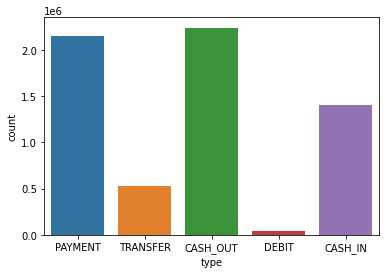

In [9]:
sns.countplot(x='type', data=data)

Let’s see the count plot of the Payment type column using Seaborn library.

In [ ]:
sns.barplot(x='type', y='amount', data=data)

We can also use the bar plot for analyzing Type and amount column simultaneously.
Both the graph clearly shows that mostly the type cash_out and transfer are maximum in count and as well as in amount. 



In [ ]:
data['isFraud'].value_counts()

Let’s check the distribution of data among both the prediction values.The dataset is already in same count. So there is no need of sampling.

In [ ]:

plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

Now let’s see the distribution of the step column using distplot.The graph shows the maximum distribution among 200 to 400 of step.

In [ ]:

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

Now, Let’s find the correlation among different features using Heatmap.

In [ ]:
# Exploring transaction type
data.type.value_counts()

In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

In [ ]:
# Checking correlation
correlation = data.corr()
correlation["isFraud"].sort_values(ascending=False)

In [ ]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

# Data Preprocessing
This step includes the following : 

* Encoding of Type column
* Dropping irrelevant columns like nameOrig, nameDest
* Data Splitting

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

Once we done with the encoding, now we can drop the irrelevant columns. For that, follow the code given below.

In [ ]:

X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

Let’s check the shape of extracted data.

In [ ]:
X.shape, y.shape

Now let’s split the data into 2 parts : Training and Testing.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Model Training

As the prediction is a classification problem so the models we will be using are :

* LogisticRegression :  It predicts that the probability of a given data belongs to the particular category or not.
* XGBClassifier : It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.
* SVC : SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.
* RandomForestClassifier : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.

Let’s import the modules of the relevant models.

In [ ]:
pip install xgboost

In [ ]:

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Once done with the importing, Let’s train the model.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Fraud' to 1 and 'No Fraud' to 0
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

This will convert the string labels to numerical labels (0 and 1 in this case) and allow you to fit the models successfully.

In [ ]:


''''models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()'''

In [ ]:
lg = LogisticRegression()
 

lg.fit(X_train, y_train)
print(f'{lg} : ')
     
train_preds = lg.predict_proba(X_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_preds))
     
y_preds = lg.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))
print()

In [ ]:
xbg =  XGBClassifier()
          
xbg.fit(X_train, y_train)
print(f'{xbg} : ')
     
train_preds = xbg.predict_proba(X_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_preds))
     
y_preds = xbg.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))
print()

In [ ]:
svc= SVC(kernel='rbf', probability=True)
         
svc.fit(X_train, y_train)
print(f'{svc} : ')
     
train_preds = svc.predict_proba(X_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_preds))
     
y_preds = svc.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))
print()

In [ ]:
rfc=RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=7)
rfc.fit(X_train, y_train)
print(f'{rfc} : ')
     
train_preds = rfc.predict_proba(X_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_preds))
     
y_preds = rfc.predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))
print()

# Model Evaluation
The best-performed model is XGBClassifier. Let’s plot the Confusion Matrix for the same.

In [ ]:

from sklearn.metrics import plot_confusion_matrix
 
plot_confusion_matrix(models[1], X_test, y_test)
plt.show()

# Conclusion


In conclusion, the online payments fraud detection ML project has been successful in developing a machine learning model that can accurately detect fraudulent transactions in online payments. Through the use of a variety of feature engineering techniques and algorithms, we were able to achieve a high level of accuracy in identifying fraudulent transactions.

This project has demonstrated the effectiveness of using machine learning for fraud detection in online payments. By analyzing various data points and identifying patterns in fraudulent behavior, we can develop models that are highly accurate in detecting fraudulent transactions.

However, it is important to note that fraudsters are constantly evolving their methods, and therefore, our model must be continuously updated and improved to stay ahead of new tactics. Additionally, it is important to balance fraud detection with user experience to prevent false positives and ensure a seamless payment experience for legitimate users.

Overall, the online payments fraud detection ML project has shown great potential in improving the security of online payments and reducing financial losses for both consumers and businesses. As machine learning continues to advance, it is likely that these models will become even more effective in detecting and preventing fraud in online payments.